In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import continuous_probabilistic_methods

### 1. Using lemonade.csv dataset and focusing on continuous variables

In [2]:
# Load lemonade.csv

url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

df = pd.read_csv(url)

# Quick summarize data set
print(df.shape)
df.head()

(365, 7)


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [4]:
# Print the descriptive statistics
df.describe() # Price is the same for all. 

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [18]:
# Is price a categorical variable?
df.Price.value_counts() # The price is the same for all the observations

0.5    365
Name: Price, dtype: int64

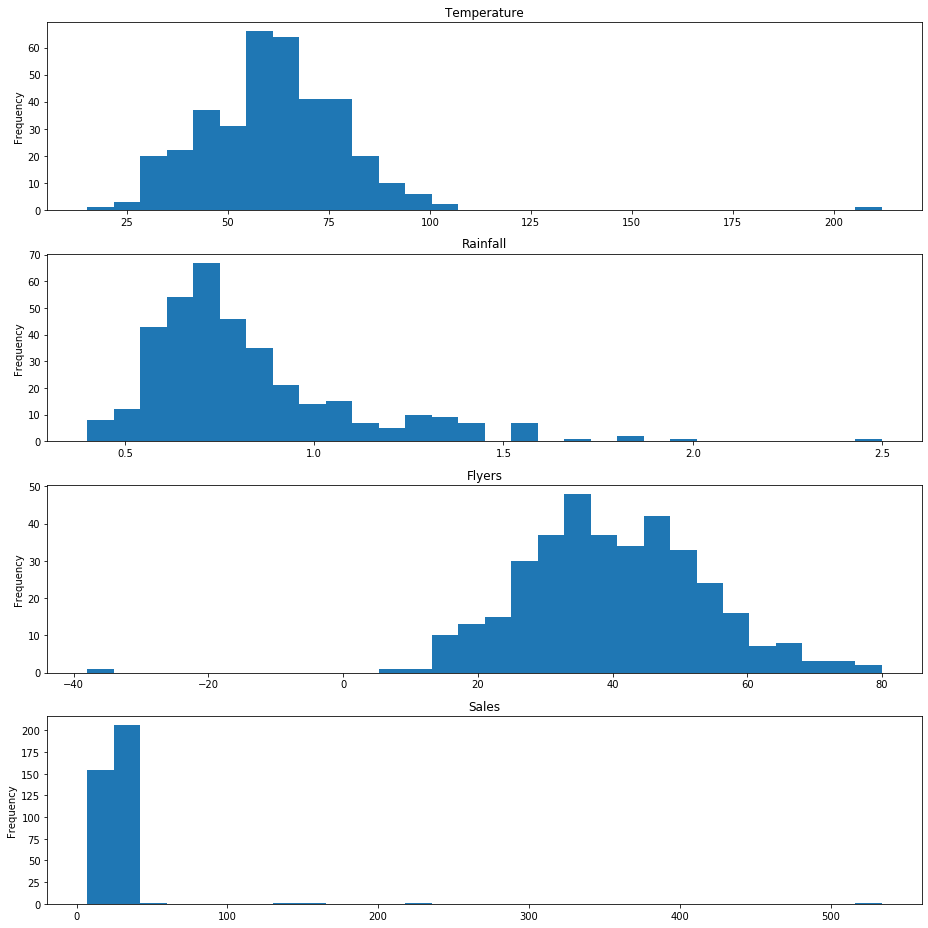

In [22]:
# Visualize the 4 continuous variables

fig, axs = plt.subplots(4, 1, figsize=(13,13))

for ax, col in zip(axs, continuous):
    df[col].plot.hist(ax=ax, bins=30)
    ax.set(title=col)
fig.tight_layout()

### 1-1. Use the IQR Range Rule and the upper and lower bounds to identify the lower/upper outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [5]:
# Print out column names
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [19]:
# Create a varible holding the names of continuous variables
continuous = ['Temperature', 'Rainfall', 'Flyers', 'Sales']
continuous

['Temperature', 'Rainfall', 'Flyers', 'Sales']

In [20]:
for col in continuous:
    lower, upper = continuous_probabilistic_methods.get_lower_and_upper_bounds(df[col])
    print(f'The mild lower outliers of {col}:', lower)
    print(f'The mild upper outliers of {col}:', upper)
    print('---------')

The mild lower outliers of Temperature: 364   -1.6
Name: Temperature, dtype: float64
The mild upper outliers of Temperature: 41    107.3
Name: Temperature, dtype: float64
---------
The mild lower outliers of Rainfall: Series([], Name: Rainfall, dtype: int64)
The mild upper outliers of Rainfall: 0      0.70
1      0.03
2      0.03
5      0.24
6      0.24
10     0.24
11     0.03
12     0.03
15     0.37
16     0.13
19     0.13
23     0.24
27     0.03
28     0.03
337    0.24
338    0.52
342    0.13
343    0.52
345    0.03
346    0.13
347    0.24
350    0.03
351    0.13
354    0.03
355    0.24
359    0.13
363    0.13
364    1.20
Name: Rainfall, dtype: float64
---------
The mild lower outliers of Flyers: 324   -42.0
Name: Flyers, dtype: float64
The mild upper outliers of Flyers: 166    1.0
194    4.0
Name: Flyers, dtype: float64
---------
The mild lower outliers of Sales: Series([], Name: Sales, dtype: int64)
The mild upper outliers of Sales: 181     98.0
182    113.0
183    190.0
184    489

### 1-1. Use the IQR Range Rule and the upper and lower bounds to identify the lower/upper outliers of each column of `lemonade.csv`, using the multiplier of 3. Do these lower outliers make sense?Which outliers should be kept?

In [21]:
for col in continuous:
    lower, upper = continuous_probabilistic_methods.get_lower_and_upper_bounds(df[col], k=3.0)
    print(f'The extreme lower outliers of {col}:', lower)
    print(f'The extreme upper outliers of {col}:', upper)
    print('---------')

The extreme lower outliers of Temperature: Series([], Name: Temperature, dtype: int64)
The extreme upper outliers of Temperature: 41    74.3
Name: Temperature, dtype: float64
---------
The extreme lower outliers of Rainfall: Series([], Name: Rainfall, dtype: int64)
The extreme upper outliers of Rainfall: 0      0.31
338    0.13
343    0.13
364    0.81
Name: Rainfall, dtype: float64
---------
The extreme lower outliers of Flyers: 324   -15.0
Name: Flyers, dtype: float64
The extreme upper outliers of Flyers: Series([], Name: Flyers, dtype: int64)
---------
The extreme lower outliers of Sales: Series([], Name: Sales, dtype: int64)
The extreme upper outliers of Sales: 181     83.0
182     98.0
183    175.0
184    474.0
Name: Sales, dtype: float64
---------


### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns: 
- Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

In [28]:
# Create a variable to hold the names of normal distributed col
normal_dist_cols = ['Temperature', 'Flyers', 'Sales']

# For Loop to print out the outliers by 2 sigma decision rule for each column

for col in normal_dist_cols:
    zscores = (df[col] - df[col].mean())/df[col].std()
    print(f'The outliers by 2 sigma for {col}', df[col][zscores.abs() >= 2])
    print('------------')

The outliers by 2 sigma for Temperature 41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64
------------
The outliers by 2 sigma for Flyers 166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64
------------
The outliers by 2 sigma for Sales 181    143
182    158
183    235
184    534
Name: Sales, dtype: int64
------------


In [29]:
# For Loop to print out the outliers by 3 sigma decision rule for each column

for col in normal_dist_cols:
    zscores = (df[col] - df[col].mean())/df[col].std()
    print(f'The outliers by 3 sigma for {col}', df[col][zscores.abs() >= 3])
    print('------------')

The outliers by 3 sigma for Temperature 41    212.0
Name: Temperature, dtype: float64
------------
The outliers by 3 sigma for Flyers 324   -38
Name: Flyers, dtype: int64
------------
The outliers by 3 sigma for Sales 181    143
182    158
183    235
184    534
Name: Sales, dtype: int64
------------
